C:\Users\SHIVANI\AppData\Local\Temp\ipykernel_185492\2137274124.py:6: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  bleaching_df = pd.read_csv('global_bleaching_environmental.csv')
C:\Users\SHIVANI\AppData\Local\Temp\ipykernel_185492\2137274124.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


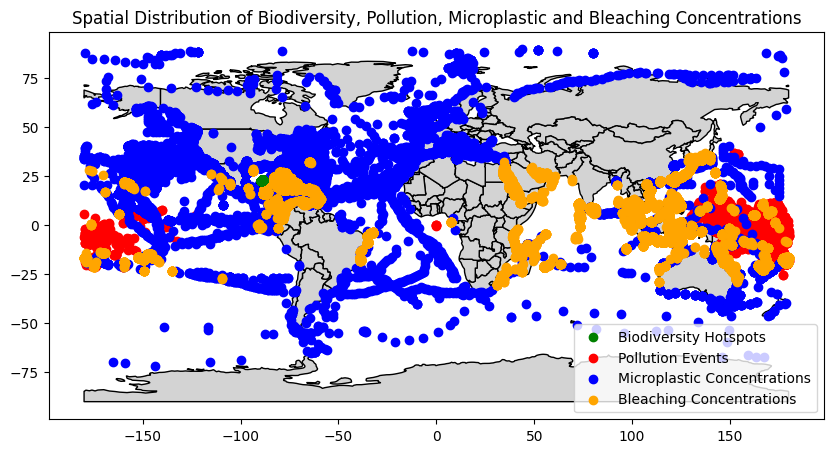

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
biodiversity_df = pd.read_csv('fish_data.csv')
pollution_df = pd.read_csv('MarinePollution.csv')
bleaching_df = pd.read_csv('global_bleaching_environmental.csv')
microplastics_df = pd.read_csv('MarineMicroplastics.csv')
# Load shapefile or GeoJSON for basemap
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting the world map
ax = world.plot(figsize=(10, 6), color='lightgrey', edgecolor='black')

# Plot biodiversity hotspots
ax.scatter(biodiversity_df['longitude'], biodiversity_df['latitude'], color='green', label='Biodiversity Hotspots', zorder=7)

# Plot pollution events
ax.scatter(pollution_df['LONG'], pollution_df['LAT_1'], color='red', label='Pollution Events', zorder=2)

# Plot microplastic concentrations
ax.scatter(microplastics_df['Longitude'], microplastics_df['Latitude'], color='blue', label='Microplastic Concentrations', zorder=3)

# Plot microplastic concentrations
ax.scatter(bleaching_df['Longitude_Degrees'], bleaching_df['Latitude_Degrees'], color='orange', label='Bleaching Concentrations', zorder=4)

# Add legend
plt.legend()

# Add title
plt.title('Spatial Distribution of Biodiversity, Pollution, Microplastic and Bleaching Concentrations')

# Show the plot
plt.show()


C:\Users\SHIVANI\AppData\Local\Temp\ipykernel_185492\3201109166.py:9: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  bleaching_events = pd.read_csv('global_bleaching_environmental.csv')


TypeError: 'value' must be an instance of str or bytes, not a float

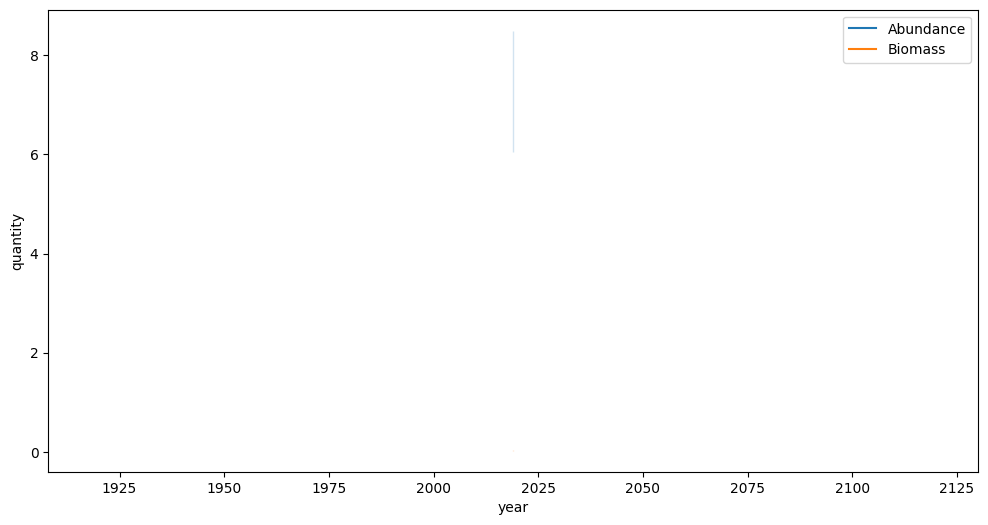

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your marine biodiversity dataset
# Replace 'biodiversity_data.csv' with the filename of your dataset
biodiversity_data = pd.read_csv('fish_data.csv')

bleaching_events = pd.read_csv('global_bleaching_environmental.csv')

# Assuming 'Year' column is available in all datasets
# Plotting temporal trends

plt.figure(figsize=(12, 6))

# Plot biodiversity metrics (e.g., abundance, biomass)
sns.lineplot(data=biodiversity_data, x='year', y='quantity', label='Abundance')
sns.lineplot(data=biodiversity_data, x='year', y='biomass', label='Biomass')

# Plot bleaching events
sns.lineplot(data=bleaching_events, x='Date_Year', y='Percent_Bleaching', label='Bleaching Events')

plt.title('Temporal Trends of Marine Biodiversity Metrics and Environmental Factors')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
biodiversity_df = pd.read_csv('fish_data.csv')
pollution_df = pd.read_csv('MarinePollution.csv')
microplastics_df = pd.read_csv('MarineMicroplastics.csv')
bleaching_df = pd.read_csv('global_bleaching_environmental.csv')

# Check the column names of biodiversity_df
print(biodiversity_df.columns)

# Assuming the latitude and longitude columns are named 'Latitude' and 'Longitude' in biodiversity_df
# Merge datasets based on common identifiers
merged_df = pd.merge(biodiversity_df, pollution_df, on=['Latitude', 'Longitude'], how='inner')
merged_df = pd.merge(merged_df, microplastics_df, on=['Latitude', 'Longitude'], how='inner')
merged_df = pd.merge(merged_df, bleaching_df, on=['Latitude', 'Longitude'], how='inner')

# Calculate correlation matrix
correlation_matrix = merged_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Marine Biodiversity and Environmental Factors')
plt.show()



Index(['label', 'year', 'month', 'day', 'region', 'island', 'side', 'id_reef',
       'reef', 'reef_joined', 'protection_status', 'latitude', 'longitude',
       'habitat', 'transect', 'area', 'phylum', 'taxa1', 'taxa2', 'taxa3',
       'family', 'trophic_group', 'trophic_level', 'functional_groups',
       'a_ord', 'b_pen', 'species', 'quantity', 'size', 'biomass'],
      dtype='object')


C:\Users\SHIVANI\AppData\Local\Temp\ipykernel_185492\1138970728.py:9: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  bleaching_df = pd.read_csv('global_bleaching_environmental.csv')


KeyError: 'Latitude'

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the marine biodiversity dataset
biodiversity_df = pd.read_csv('fish_data.csv')

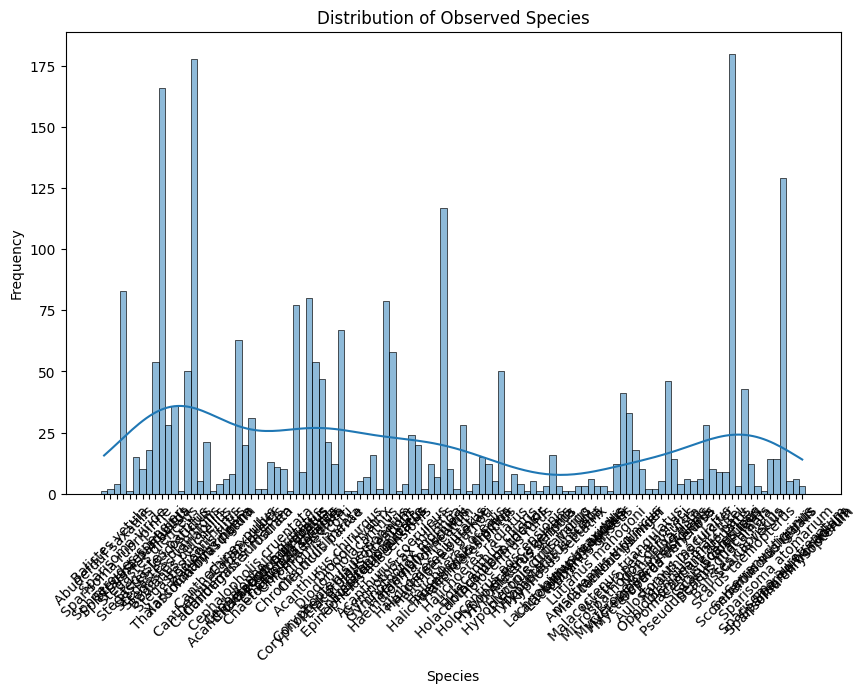

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(biodiversity_df['species'], bins=20, kde=True)
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Distribution of Observed Species')
plt.show()

C:\Users\SHIVANI\AppData\Local\Temp\ipykernel_185492\279490587.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_species_count = biodiversity_df.groupby(pd.Grouper(key='Date', freq='M'))['quantity'].sum().reset_index()


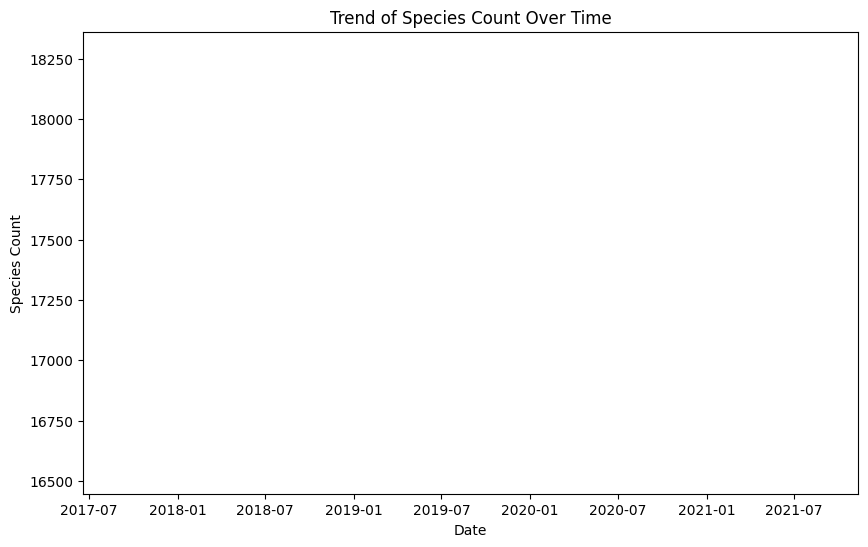

In [20]:
# Convert 'Year', 'Month', and 'Day' columns to datetime format
biodiversity_df['Date'] = pd.to_datetime(biodiversity_df[['year', 'month', 'day']])

# Aggregate species count by month
monthly_species_count = biodiversity_df.groupby(pd.Grouper(key='Date', freq='M'))['quantity'].sum().reset_index()

# Plot the trend of species count over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='quantity', data=monthly_species_count)
plt.xlabel('Date')
plt.ylabel('Species Count')
plt.title('Trend of Species Count Over Time')
plt.show()


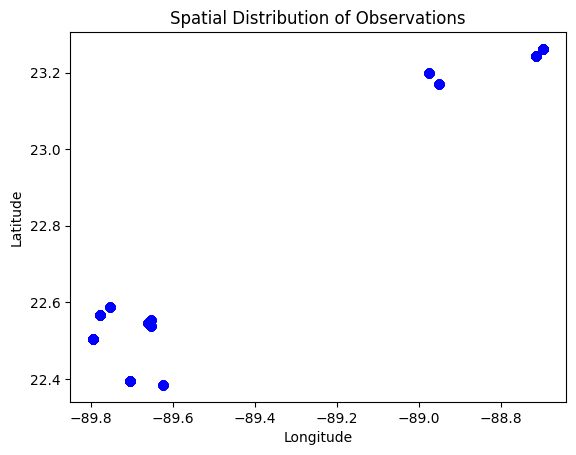

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('fish_data.csv')
plt.scatter(df['longitude'], df['latitude'], color='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Observations')
plt.show()

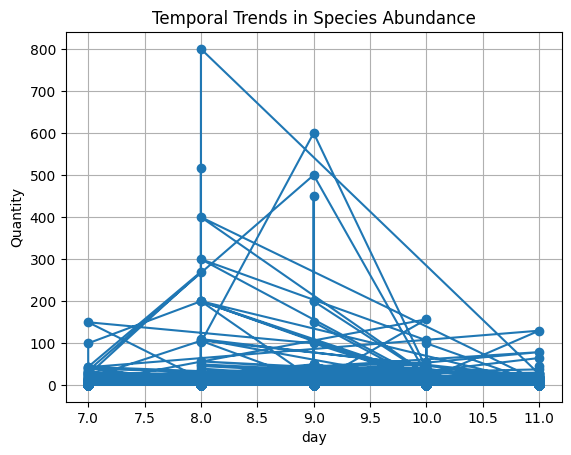

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('fish_data.csv')
# Assuming 'Year' column exists
plt.plot(df['day'], df['quantity'], marker='o', linestyle='-')
plt.xlabel('day')
plt.ylabel('Quantity')
plt.title('Temporal Trends in Species Abundance')
plt.grid(True)
plt.show()


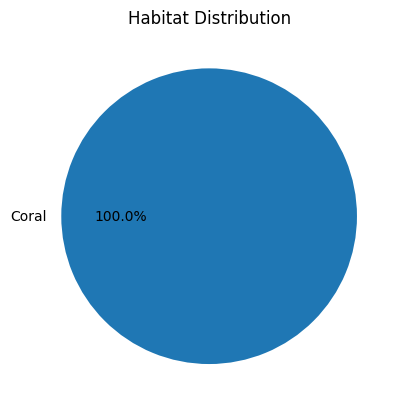

In [28]:
import matplotlib.pyplot as plt

df['habitat'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Habitat Distribution')
plt.ylabel('')
plt.show()


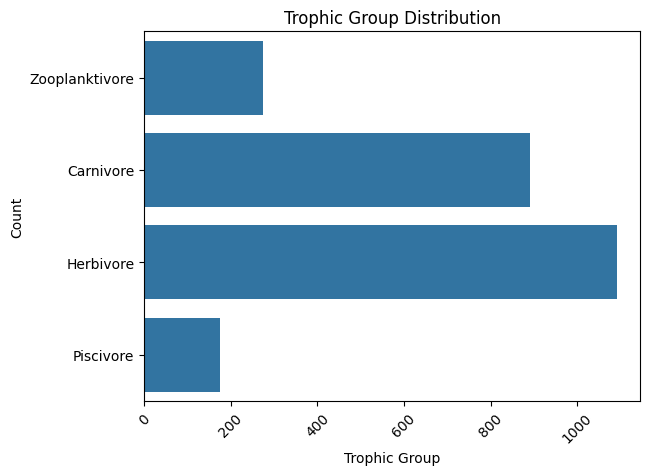

In [29]:
import seaborn as sns
sns.countplot(df['trophic_group'])
plt.xlabel('Trophic Group')
plt.ylabel('Count')
plt.title('Trophic Group Distribution')
plt.xticks(rotation=45)
plt.show()

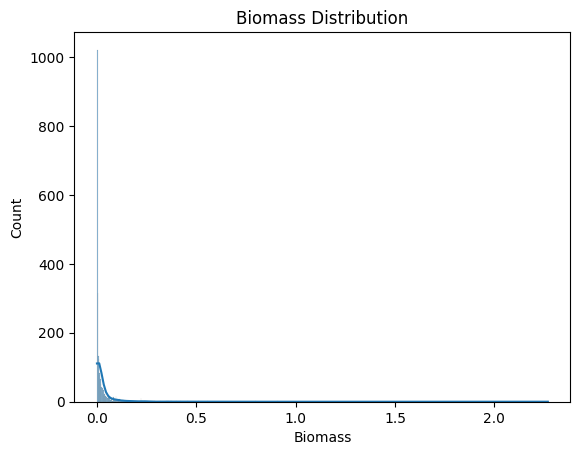

In [30]:
import seaborn as sns

sns.histplot(df['biomass'], kde=True)
plt.xlabel('Biomass')
plt.ylabel('Count')
plt.title('Biomass Distribution')
plt.show()

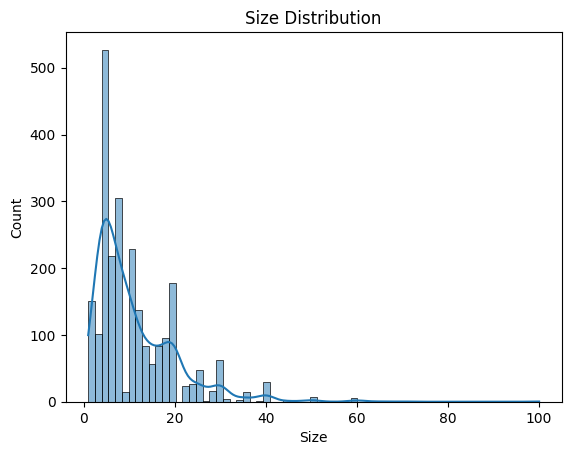

In [31]:
import seaborn as sns

sns.histplot(df['size'], kde=True)
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Size Distribution')
plt.show()